<a href="https://colab.research.google.com/github/2203A52087/DATA-ANALYSIS-USING-PYTHON/blob/main/2203A52087_SANDESH_NAYAK_CANCER_DEATHS_RATE__CSV_FILE_(PROJECT_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
# Load dataset
file_path = "/content/01 annual-number-of-deaths-by-cause.csv"
df = pd.read_csv(file_path)

In [ ]:
# Step 3: Outlier Detection & Removal (IQR Method)
# Calculate IQR for the 'Close' column
Q1 = df['Year'].quantile(0.25)
Q3 = df['Year'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = df[(df['Year'] >= lower_bound) & (df['Year'] <= upper_bound)]
print(f"Number of outliers removed: {df.shape[0] - df_cleaned.shape[0]}")

Number of outliers removed: 0


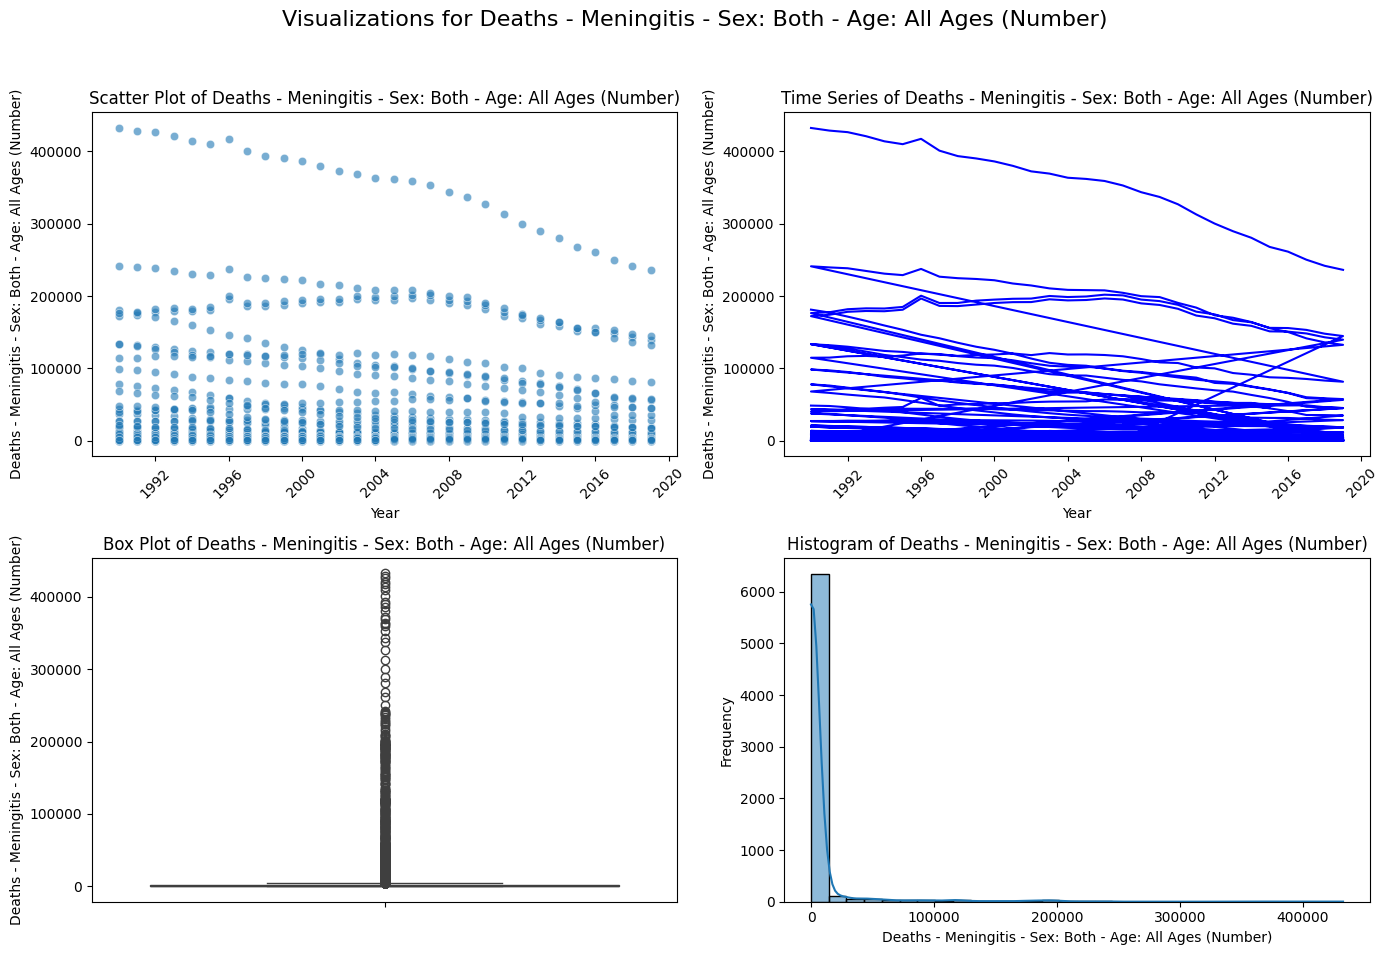

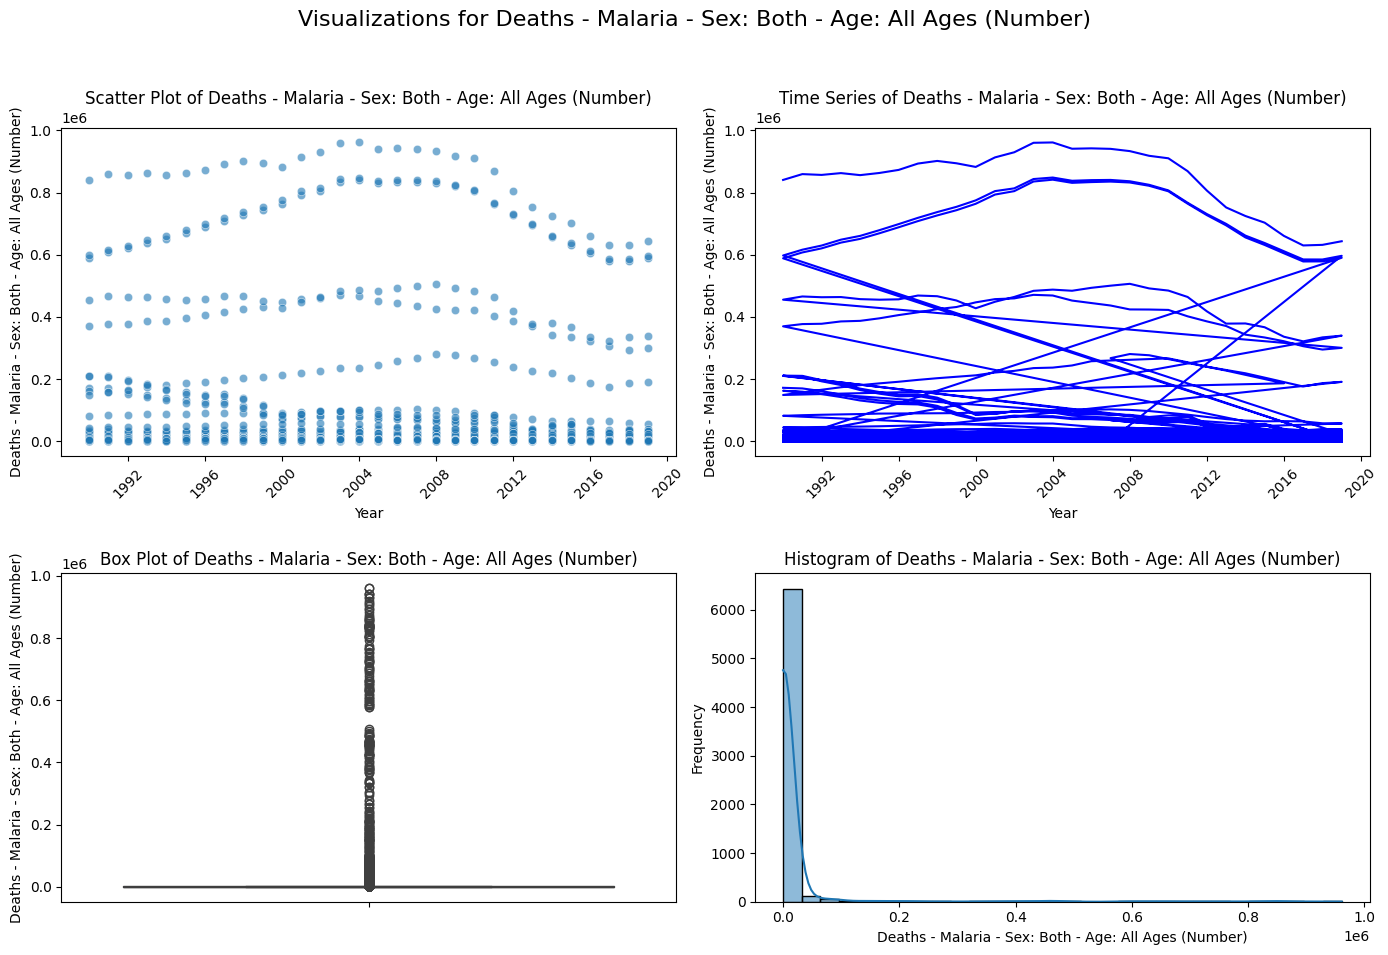

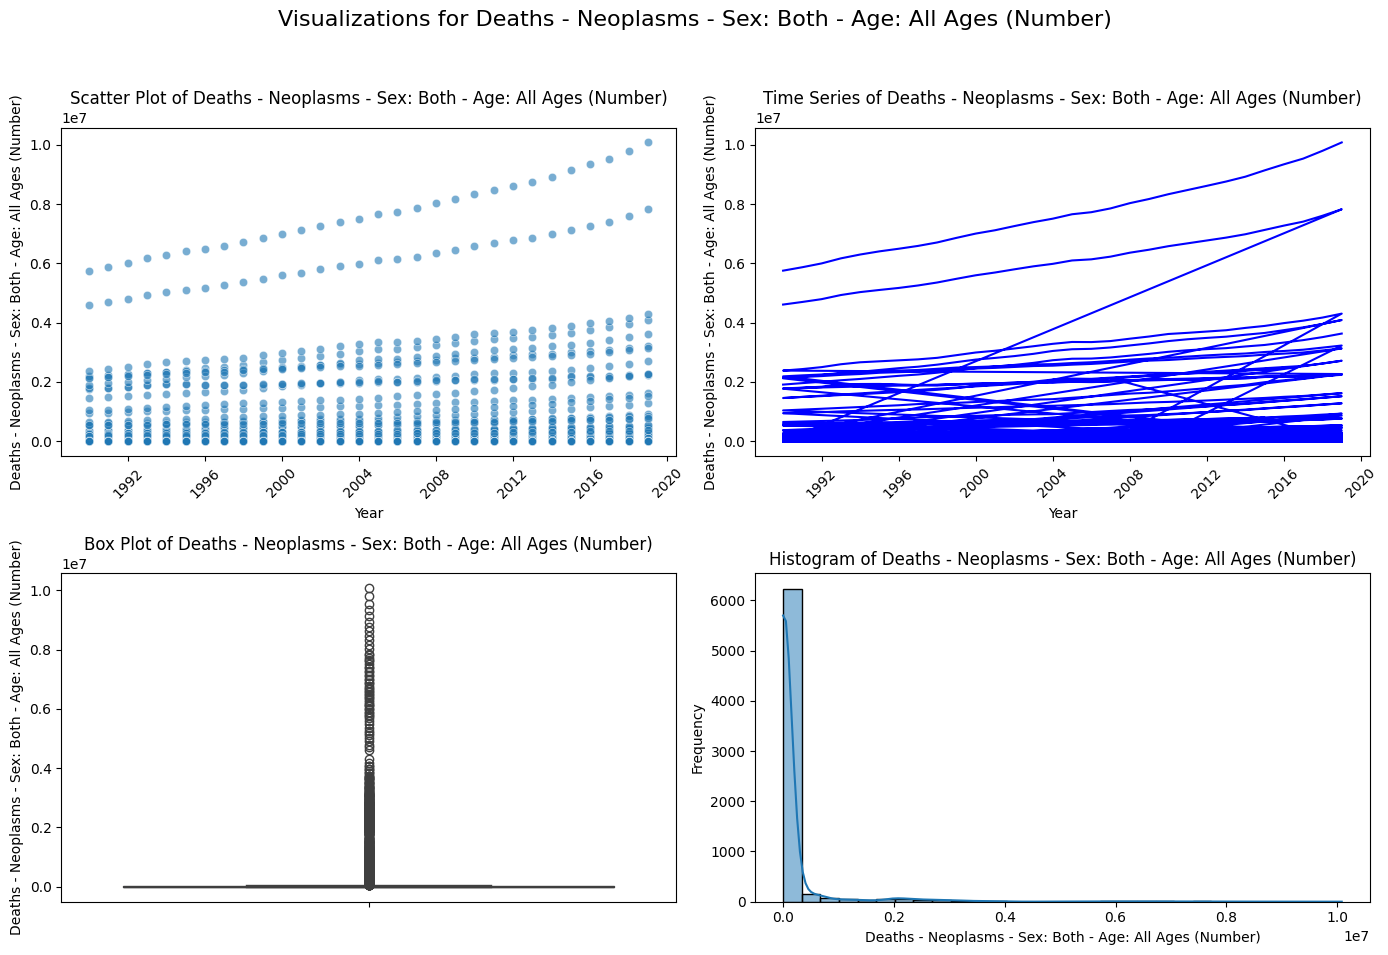

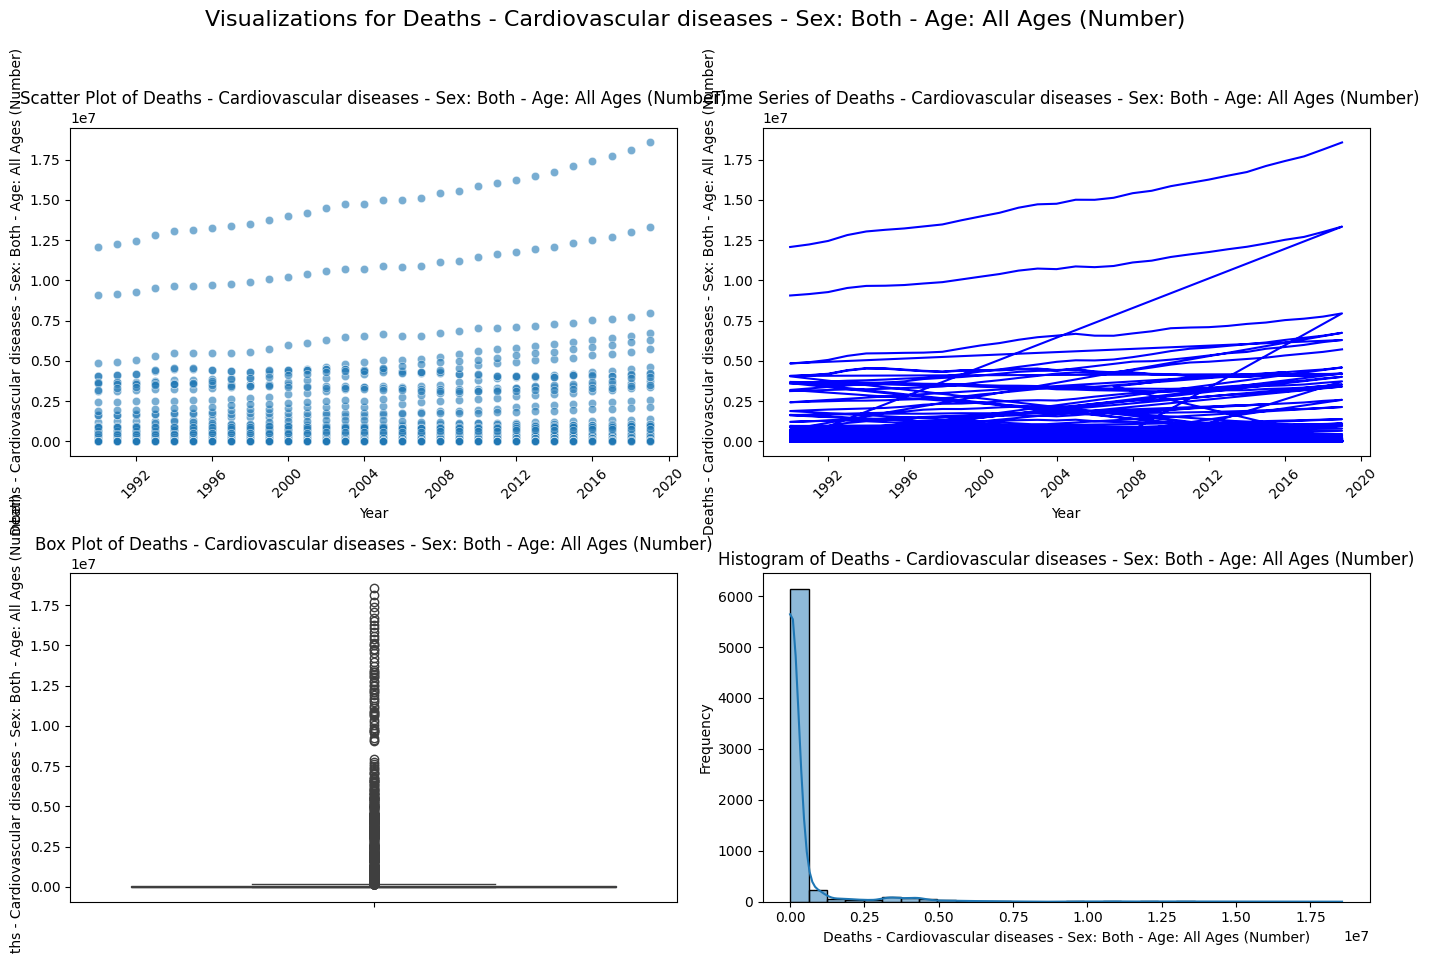

In [ ]:
# Convert 'Year' column to datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# List of numeric columns to plot
numeric_columns = [
    'Deaths - Meningitis - Sex: Both - Age: All Ages (Number)',
    'Deaths - Malaria - Sex: Both - Age: All Ages (Number)',
    'Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)',
    'Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number)'
]
# Loop over each numeric column to create the graphs
for col in numeric_columns:
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f'Visualizations for {col}', fontsize=16)

    # Scatter plot: Year vs. column
    sns.scatterplot(ax=axes[0, 0], x=df['Year'], y=df[col], alpha=0.6)
    axes[0, 0].set_title(f'Scatter Plot of {col}')
    axes[0, 0].set_xlabel('Year')
    axes[0, 0].set_ylabel(col)
    axes[0, 0].tick_params(axis='x', rotation=45)

    # Time series plot (line plot): Year vs. column
    axes[0, 1].plot(df['Year'], df[col], color='blue')
    axes[0, 1].set_title(f'Time Series of {col}')
    axes[0, 1].set_xlabel('Year')
    axes[0, 1].set_ylabel(col)
    axes[0, 1].tick_params(axis='x', rotation=45)

    # Box plot: Distribution of the column
    sns.boxplot(ax=axes[1, 0], y=df[col])
    axes[1, 0].set_title(f'Box Plot of {col}')
    axes[1, 0].set_ylabel(col)

    # Histogram: Distribution of the column with KDE
    sns.histplot(ax=axes[1, 1], data=df, x=col, bins=30, kde=True)
    axes[1, 1].set_title(f'Histogram of {col}')
    axes[1, 1].set_xlabel(col)
    axes[1, 1].set_ylabel('Frequency')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


In [ ]:
# Convert 'Year' column to datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Create Target variable (predicting if death rate increases next year)
df['Target'] = (df['Deaths - Meningitis - Sex: Both - Age: All Ages (Number)'].shift(-1) >
                 df['Deaths - Meningitis - Sex: Both - Age: All Ages (Number)']).astype(int)
df = df.dropna()

# Define Features and Split Data
features = [
    'Deaths - Meningitis - Sex: Both - Age: All Ages (Number)',
    'Deaths - Malaria - Sex: Both - Age: All Ages (Number)',
    'Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)',
    'Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number)'
]
X = df[features]
y = df['Target']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for models that need it (Logistic Regression & SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_pred))
print("-" * 60)

# 2. Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, dtc_pred))
print("-" * 60)

# 3. Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, rfc_pred))
print("-" * 60)

# 4. Support Vector Machine (SVM)
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train_scaled, y_train)
svm_pred = svm_clf.predict(X_test_scaled)
print("SVM Classification Report:")
print(classification_report(y_test, svm_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.69      1.00      0.82        25
           1       0.00      0.00      0.00        11

    accuracy                           0.69        36
   macro avg       0.35      0.50      0.41        36
weighted avg       0.48      0.69      0.57        36

------------------------------------------------------------
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.64      0.67        25
           1       0.31      0.36      0.33        11

    accuracy                           0.56        36
   macro avg       0.50      0.50      0.50        36
weighted avg       0.58      0.56      0.56        36

------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.76      0.73        25
           1       0.33      0.27      0.30        11

    accuracy                           0.61        36
   macro avg       0.52      0.52      0.52        36
weighted avg       0.59      0.61      0.60        36

------------------------------------------------------------
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.69      1.00      0.82        25
           1       0.00      0.00      0.00        11

    accuracy                           0.69        36
   macro avg       0.35      0.50      0.41        36
weighted avg       0.48      0.69      0.57        36



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


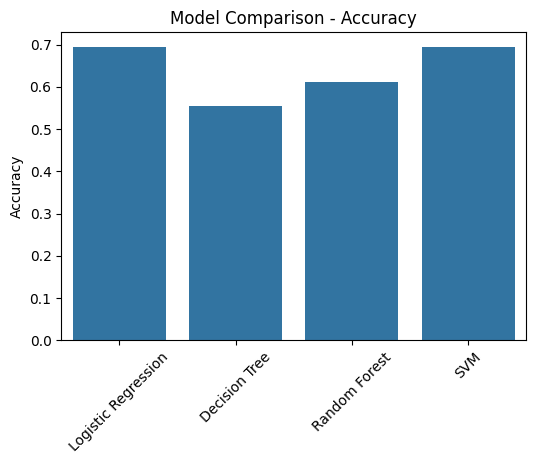

In [ ]:
class_models = {
    "Logistic Regression": lr,
    "Decision Tree": dtc,
    "Random Forest": rfc,
    "SVM": svm_clf
}

# Bar Plot for Accuracy
plt.figure(figsize=(6, 4))
sns.barplot(x=list(class_models.keys()), y=[accuracy_score(y_test, model.predict(X_test_scaled if name in ["Logistic Regression", "SVM"] else X_test)) for name, model in class_models.items()]) # Use X_test_scaled for models that require scaled data
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Model Comparison - Accuracy")
plt.show()

In [ ]:
# Statistical Analysis
print("\nStatistical Summary:")
for col in numeric_columns: # Change numerical_columns to numeric_columns
    print(f"\nColumn: {col}")
    print(f"Mean: {df[col].mean()}")
    print(f"Median: {df[col].median()}")
    print(f"Mode: {df[col].mode()[0]}")
    print(f"Variance: {df[col].var()}")
    print(f"Standard Deviation: {df[col].std()}")
    print(f"Range: {df[col].max() - df[col].min()}")
    print(f"Skewness: {df[col].skew()}")
    print(f"Kurtosis: {df[col].kurt()}")


Statistical Summary:

Column: Deaths - Meningitis - Sex: Both - Age: All Ages (Number)
Mean: 6471.653409090909
Median: 1134.0
Mode: 49.0
Variance: 186152168.73061678
Standard Deviation: 13643.759332772503
Range: 62221.0
Skewness: 3.00989107911158
Kurtosis: 8.258322264191914

Column: Deaths - Malaria - Sex: Both - Age: All Ages (Number)
Mean: 10452.65909090909
Median: 24.5
Mode: 0.0
Variance: 1792865761.4602547
Standard Deviation: 42342.24558830406
Range: 280604.0
Skewness: 5.4528632268852535
Kurtosis: 29.89726105209196

Column: Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)
Mean: 225206.8465909091
Median: 23926.5
Mode: 8663.0
Variance: 276389850203.58215
Standard Deviation: 525727.9241238591
Range: 2477253.0
Skewness: 3.322759856543622
Kurtosis: 10.56534283078045

Column: Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number)
Mean: 418097.9375
Median: 66420.5
Mode: 838.0
Variance: 840701643791.2214
Standard Deviation: 916897.8371613827
Range: 4292143.0
Skewness

In [ ]:
import pandas as pd
import scipy.stats as stats

# Load the dataset
file_path = "/content/01 annual-number-of-deaths-by-cause.csv"
df = pd.read_csv(file_path)

# One-Sample Z-Test Function
def one_sample_z_test(data, mu_0):
    sample_mean = data.mean()
    sample_std = data.std()
    n = len(data)

    # Compute Z-score
    z_score = (sample_mean - mu_0) / (sample_std / (n ** 0.5))

    # Compute P-value (two-tailed test)
    p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

    return z_score, p_value


In [ ]:
from scipy import stats
import numpy as np

# One-Sample Z-Test Function
def one_sample_z_test(data, mu_0):
    mean = data.mean()
    std = data.std()
    n = len(data)
    se = std / np.sqrt(n)
    z = (mean - mu_0) / se
    p = 2 * (1 - stats.norm.cdf(abs(z)))
    return z, p

# Two-Sample Z-Test Function
def two_sample_z_test(data1, data2):
    mean1, mean2 = data1.mean(), data2.mean()
    std1, std2 = data1.std(), data2.std()
    n1, n2 = len(data1), len(data2)
    se = np.sqrt((std1**2 / n1) + (std2**2 / n2))
    z = (mean1 - mean2) / se
    p = 2 * (1 - stats.norm.cdf(abs(z)))
    return z, p

# Columns from dataset
malaria_col = "Deaths - Malaria - Sex: Both - Age: All Ages (Number)"
tb_col = "Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number)"

# One-Sample Z-Test (Malaria vs. hypothetical mean)
mu_0 = 100000
z1, p1 = one_sample_z_test(df[malaria_col].dropna(), mu_0)

# Two-Sample Z-Test (Malaria vs. TB)
z2, p2 = two_sample_z_test(df[malaria_col].dropna(), df[tb_col].dropna())

# Results
print(f"One-Sample Z-Test: Z = {z1:.2f}, P = {p1:.10f}")
print(f"Two-Sample Z-Test: Z = {z2:.2f}, P = {p2:.10f}")


One-Sample Z-Test: Z = -68.90, P = 0.0000000000
Two-Sample Z-Test: Z = -8.07, P = 0.0000000000


In [ ]:
from scipy import stats

# Two-Sample T-Test Function
def two_sample_t_test(data1, data2):
    t_stat, p_val = stats.ttest_ind(data1, data2, equal_var=False)
    return t_stat, p_val

# Columns from dataset
malaria_col = "Deaths - Malaria - Sex: Both - Age: All Ages (Number)"
tb_col = "Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number)"

# Two-Sample T-Test
t_stat, p_ttest = two_sample_t_test(df[malaria_col].dropna(), df[tb_col].dropna())

# Results
print(f"Two-Sample T-Test: t = {t_stat:.2f}, P = {p_ttest:.10f}")


Two-Sample T-Test: t = -8.07, P = 0.0000000000
